---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Applied Machine Learning: Module 2 (Supervised Learning, Part I)

## Preamble and Review

The supervised aspect refers to the need for each training example to have alabel in order to learn how to make accurate predictions on future examples.
Important terms:
- Feature representation: refere to the act of taking an object like a piece o fruit and converting it into numbers that the computer can understand.
- The term **instance** or **sample** or **examples** are often used interchangebly to express each row of the dataset. 
- The convention in this course is use X to put all the variable the variables that represent features
- A **target value (TV)**. This course convention to use the variable y to target values 
    - In classification problems the TV is the the label of an object 
    - In regression is the particular continous valur you might want to protect from the inputs
- **Trainning and test sets :**
    - A chunck of the original dataset will be the trainning set (75%)
    - We reserve a often smaller subset to be the test set (25%)
- **Model/estimator**:
    - The training set is used to estimate the parameters for a model. This procedure is called **model fitting** and its results is a trained model.
- **Evaluation methods**: is the step where we've fit the mdeodel and we can evaluate the accuracy of the fitting
- Two types of supervised learning: Classification and Regression
    - Both of them take a set of training instances and learn a mapping to a target value
    - For classification the target is a discrete class value:
        - Binary classification: the target can assume two values
        - Multi-class classification: the target is one of a set of discrete values
    - For regression the target is a continous value (float point/real valued)
- **K-nearest neighbors** makes few assumptions about the structure of the data and gives potentially accurate but sometimes unstable predictions. Also it is sensible to small changes in the training data.
- **Linear models** make strong assumptions about the structure of the data and give stable but potentialy inaccurate predictions.
- **Model complexity** and **Model accuracy**:
    - The relationship is different depending on whether the classifier performance is measured on the training set, what is labeled here as training set score, or the test set labeled here as test set score.
    - When measuring performance in the taining set, the same was used in the classifier, it can be shown that a model's complexity increases as the model accuracy also increases
- **Model** is a specific mathematical descreiption that expresses the relation between a set of input variables and one or more outcome variables that are being studied or predicted
- **Input variables** are called **independent variables** or **features** and the **outcome variables** are the **dependent variables** or **target value**.
- **Generalization**:
    - Refers to the ability to give accurate prediction for new, previously unseen data
    - Assumptions:
        - feature data will have the same properties as the current sets
        - thus models that are accurate on training set are expected to be accurate on  the test set
        - but that may no happen if the trained modoel is tued too specifically to the training set
- **Overfitting** typicaly occurs when we try to fit a complex model with an inadequate amount of training data
    - overfitting model uses its ability to capture complex patterns by being great at predicting lots and lots of specific samples or areas of local variation in the training set, but often misses seeing global paptterns in the training set that would help it generilize well on the useen test set 

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train) #model fitting procedure
#this function updates the internal state of the KNN object 
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
example_fruit_scaled = scaler.transform(example_fruit)
print('Predicted fruit type for ', example_fruit, ' is ', 
          target_names_fruits[knn.predict(example_fruit_scaled)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


## Datasets

<IPython.core.display.Javascript object>


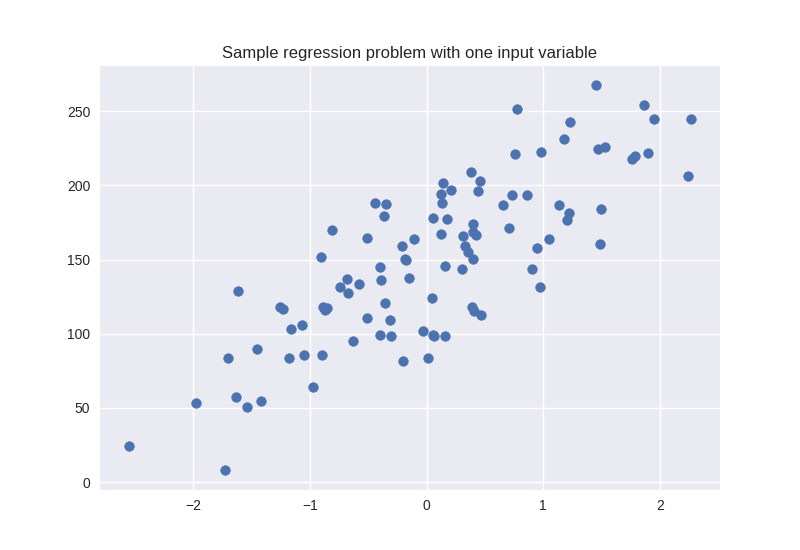

<IPython.core.display.Javascript object>


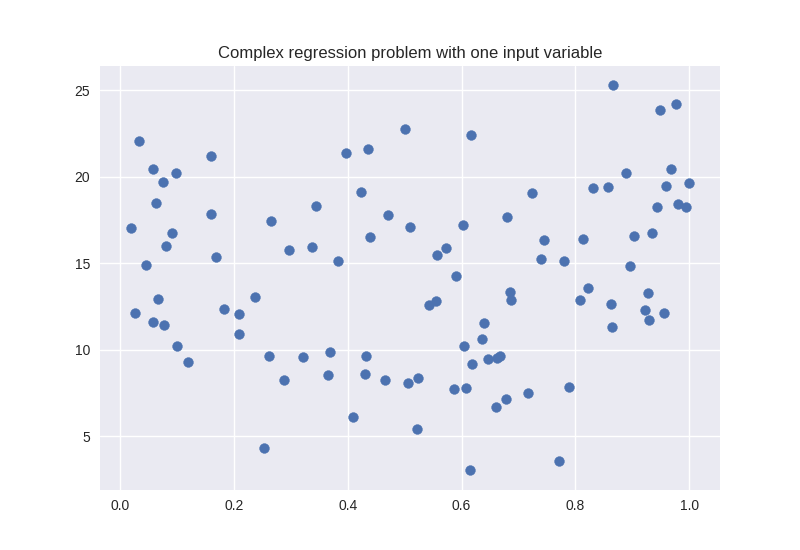

<IPython.core.display.Javascript object>


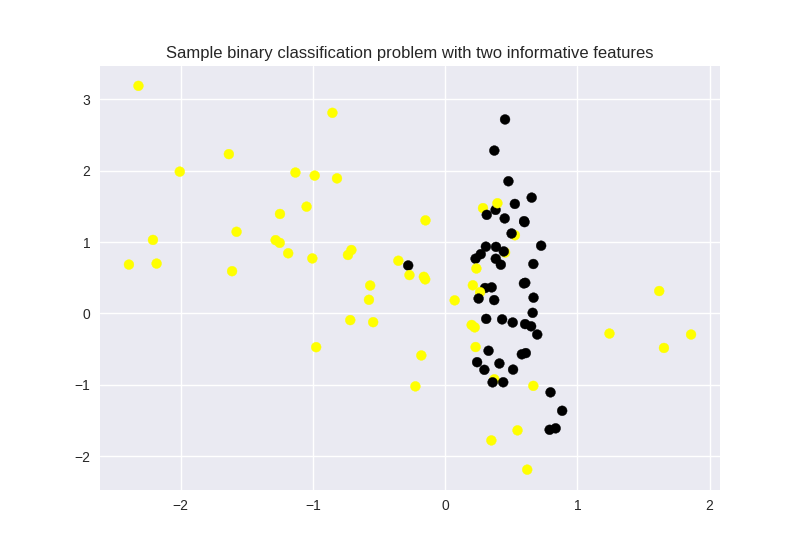

<IPython.core.display.Javascript object>


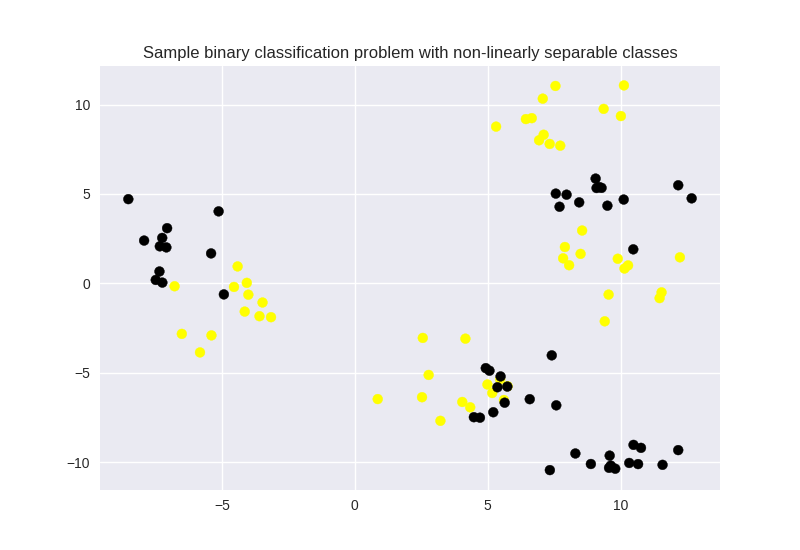

In [2]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

## K-Nearest Neighbors

### Classification

<IPython.core.display.Javascript object>


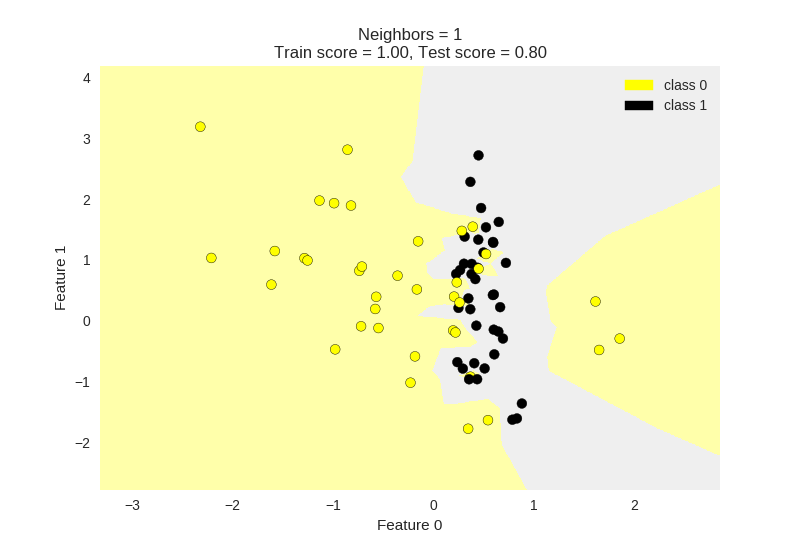

<IPython.core.display.Javascript object>


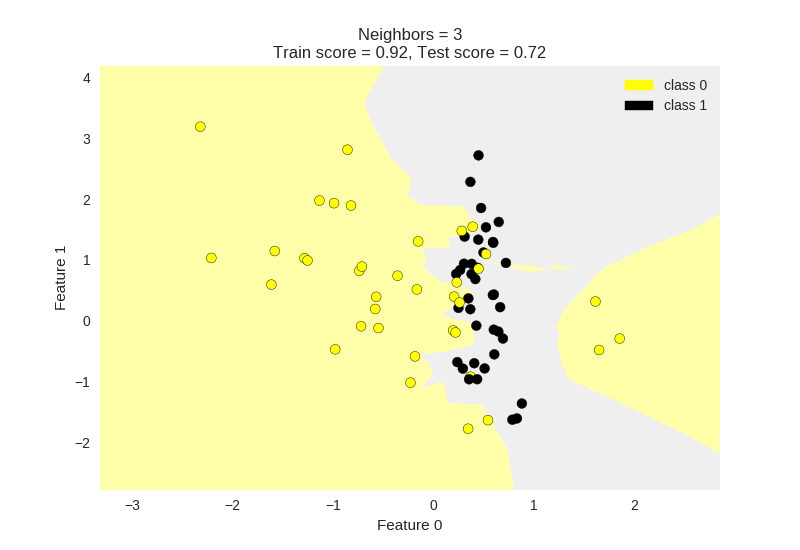

<IPython.core.display.Javascript object>


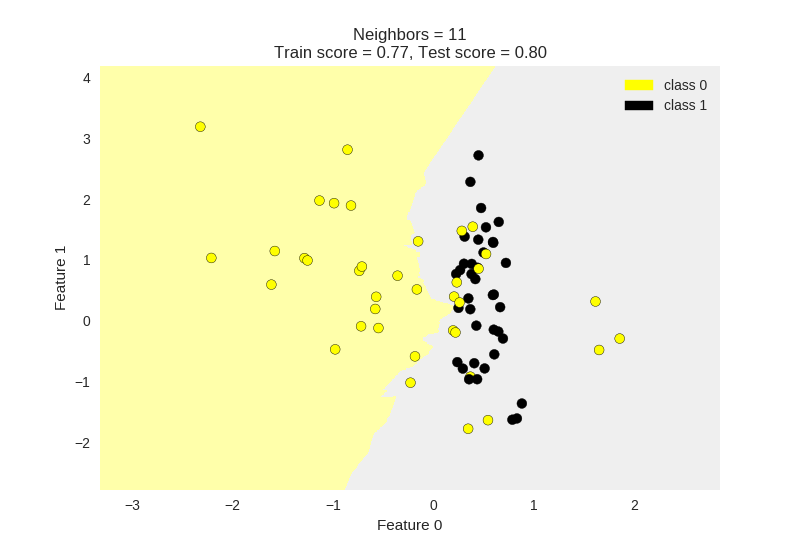

In [7]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

#for k=1 the model tends to be overfited
plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

### Regression

- r-squared regression score measures how well a prediction model for regression fits the given data
    - Also known as "coefficient of determination"
    - The score is between 0 and 1:
        - A value of 0 corresponds to a constant model that predicts the mean value of all training target values
        - a value of 1 corresponds to perfect prediction
        

In [11]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 231.71  148.36  150.59  150.59   72.15  166.51  141.91  235.57  208.26
  102.1   191.32  134.5   228.32  148.36  159.17  113.47  144.04  199.23
  143.19  166.51  231.71  208.26  128.02  123.14  141.91]
R-squared test score: 0.425


<IPython.core.display.Javascript object>


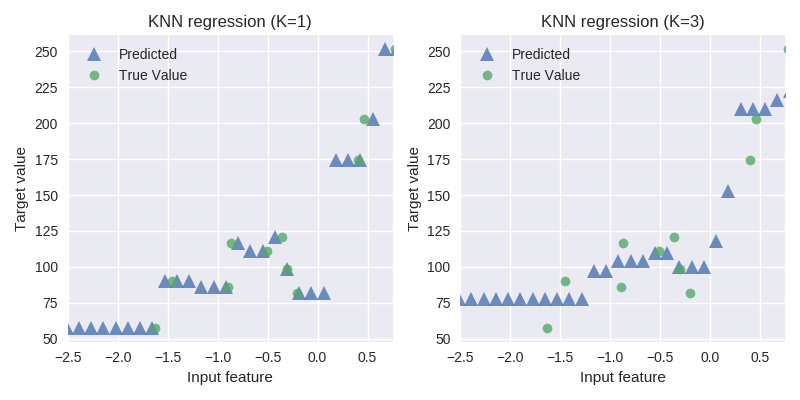

In [12]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Regression model complexity as a function of K

<IPython.core.display.Javascript object>


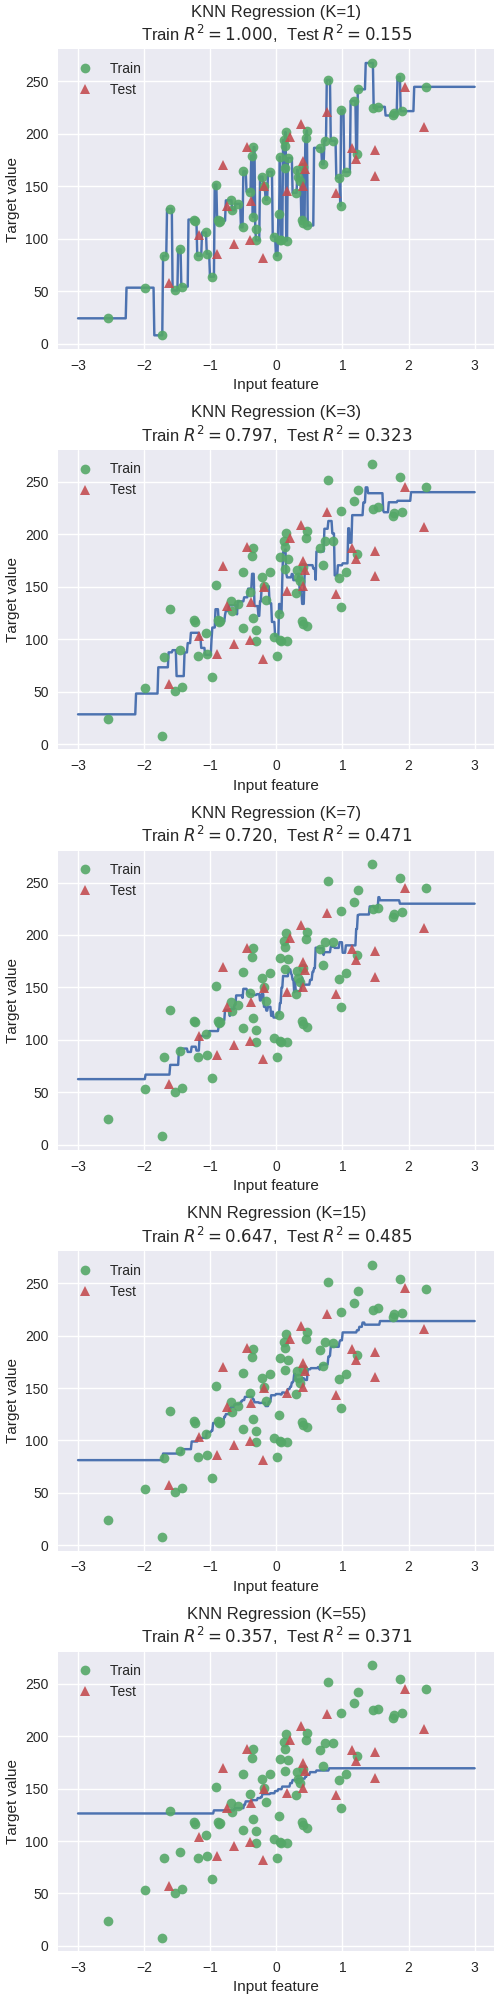

In [13]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


## Linear models for regression

- A linear model is a sum of weighted variables that predicts a target output value given an input data instance
- One regression model used to estimate the linear regression parameters is the least-square linear regression
    - LL linear regression finds w and b that minimizes the mean squared error of the model: the sum of squared differences between predicted taget and actual target values.
    - no parameters to control model complexity: no matter what the value of w and b the result is always going to be a straight line
- Linear models make a strong prior assumption about the relationship between the input x and output y
- linear models for data with many features linear models can be very effective and generalize well to new data beyond the training set
- How linear regression parameters w, b are estimated?
    - Parameters are estimated from training data
    - There are manu different ways to estimate w and b
        - Different methods correspon to different fit criteria and goals and ways to control model complexity
    - The learning algorithm finds the parameters that optmize an objective function, typically to minimize some kind of loss function of the predicted target values vs. actual target values

### Linear regression

In [8]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
print(X_train.shape)
print(y_train.shape)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

(75, 1)
(75,)
linear model coeff (w): [ 45.71]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


### Linear regression: example plot 

<IPython.core.display.Javascript object>


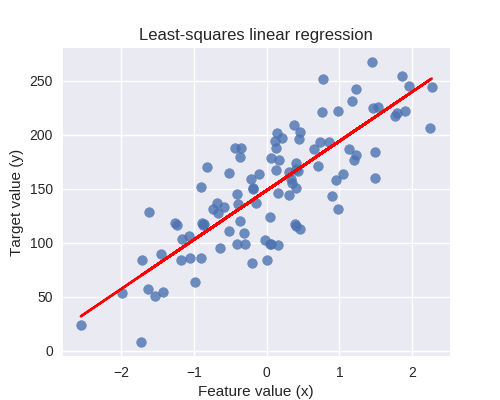

In [15]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306726048451
linear model coeff:
[  1.62e-03  -9.43e+01   1.36e+01  -3.13e+01  -8.15e-02  -1.69e+01
  -2.43e-03   1.53e+00  -1.39e-02  -7.72e+00   2.28e+01  -5.66e+00
   9.35e+00   2.07e-01  -7.43e+00   9.66e-03   4.38e-03   4.80e-03
  -4.46e+00  -1.61e+01   8.83e+00  -5.07e-01  -1.42e+00   8.18e+00
  -3.87e+00  -3.54e+00   4.49e+00   9.31e+00   1.74e+02   1.18e+01
   1.51e+02  -3.30e+02  -1.35e+02   6.95e-01  -2.38e+01   2.77e+00
   3.82e-01   4.39e+00  -1.06e+01  -4.92e-03   4.14e+01  -1.16e-03
   1.19e+00   1.75e+00  -3.68e+00   1.60e+00  -8.42e+00  -3.80e+01
   4.74e+01  -2.51e+01  -2.88e-01  -3.66e+01   1.90e+01  -4.53e+01
   6.83e+02   1.04e+02  -3.29e+02  -3.14e+01   2.74e+01   5.12e+00
   6.92e+01   1.98e-02  -6.12e-01   2.65e+01   1.01e+01  -1.59e+00
   2.24e+00   7.38e+00  -3.14e+01  -9.78e-05   5.02e-05  -3.48e-04
  -2.50e-04  -5.27e-01  -5.17e-01  -4.10e-01   1.16e-01   1.46e+00
  -3.04e-01   2.44e+00  -3.66e+01   1.41e-01   2.89

### Ridge regression

- Ridge regression learns w, b using the same least-squares criterion but adds a penalty for lalrg variations in w parameters
- Once the parameters are learned, the ridge regression prediction formula is the same as ordinary least-squares
- The addition of a paprameter pepnalty is called regularization. Regularization prevents overfitting by restricting the model, typically to reduce its complexity
- Ridge regression uses L2 regularization: minimize sum of squares of w entries
- The influence of the regularization term is controlled by the α parameter
- higher α means more regularization and simpler models



In [32]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

linridge = Ridge(alpha=20.0).fit(X_train, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: -3352.423035846206
ridge regression linear model coeff:
[  1.95e-03   2.19e+01   9.56e+00  -3.59e+01   6.36e+00  -1.97e+01
  -2.81e-03   1.66e+00  -6.61e-03  -6.95e+00   1.72e+01  -5.63e+00
   8.84e+00   6.79e-01  -7.34e+00   6.70e-03   9.79e-04   5.01e-03
  -4.90e+00  -1.79e+01   9.18e+00  -1.24e+00   1.22e+00   1.03e+01
  -3.78e+00  -3.73e+00   4.75e+00   8.43e+00   3.09e+01   1.19e+01
  -2.05e+00  -3.82e+01   1.85e+01   1.53e+00  -2.20e+01   2.46e+00
   3.29e-01   4.02e+00  -1.13e+01  -4.70e-03   4.27e+01  -1.23e-03
   1.41e+00   9.35e-01  -3.00e+00   1.12e+00  -1.82e+01  -1.55e+01
   2.42e+01  -1.32e+01  -4.20e-01  -3.60e+01   1.30e+01  -2.81e+01
   4.39e+01   3.87e+01  -6.46e+01  -1.64e+01   2.90e+01   4.15e+00
   5.34e+01   1.99e-02  -5.47e-01   1.24e+01   1.04e+01  -1.57e+00
   3.16e+00   8.78e+00  -2.95e+01  -2.33e-04   3.14e-04  -4.14e-04
  -1.80e-04  -5.74e-01  -5.18e-01  -4.21e-01   1.53e-01   1.33e+00
   3.85e+00   3.03

#### Ridge regression with feature normalization

- The feature normalization is important for some machin learning methods that all features are on the same scale (e.g. faster convergence in learning, more uniform or fair influence for all weights)
- Can also depend on the data.
- MinMax scaling of the features:
    - for each feature $x_i$: compute the min value $x_i^{min}$ and the max value $x_i^{max}$ achieved across all instances in the training set
    - for each feature: transform a given feature $x_i$ value toa a scaled $x_i'$ using a formula
        - $x_i'=\frac{x_i-x_i^{min}}{x_i^{max}-x_i^{min}}$ 
- The test set must use identical scaling to the training set
    - Fit the scaler using the training set then apply the same scale to transform the test set
    - do not scale the training and test sets using different scalers: this could lead to random skew in the data
    - Do not fit the scaler using any part of the test data: referencing the test data can lead to a form of data _leakage_. 
    - One downside of using normalization is that the result and the transformed features may be harder to interpret.
    - The type of feature normalization that's best to apply can depend on the data set, learning task and learning algorithm to be used.
    - Using feature normalization in standard least-square do not affect the result at all, while using this in ridge regression can incresse the quality of the model.


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
#the next function looks for the min and max x_i and apply the transformation
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Crime dataset
ridge regression linear model intercept: 933.390638504416
ridge regression linear model coeff:
[  88.69   16.49  -50.3   -82.91  -65.9    -2.28   87.74  150.95   18.88
  -31.06  -43.14 -189.44   -4.53  107.98  -76.53    2.86   34.95   90.14
   52.46  -62.11  115.02    2.67    6.94   -5.67 -101.55  -36.91   -8.71
   29.12  171.26   99.37   75.07  123.64   95.24 -330.61 -442.3  -284.5
 -258.37   17.66 -101.71  110.65  523.14   24.82    4.87  -30.47   -3.52
   50.58   10.85   18.28   44.11   58.34   67.09  -57.94  116.14   53.81
   49.02   -7.62   55.14  -52.09  123.39   77.13   45.5   184.91  -91.36
    1.08  234.09   10.39   94.72  167.92  -25.14   -1.18   14.6    36.77
   53.2   -78.86   -5.9    26.05  115.15   68.74   68.29   16.53  -97.91
  205.2    75.97   61.38  -79.83   67.27   95.67  -11.88]
R-squared score (training): 0.615
R-squared score (test): 0.599
Number of non-zero features: 88


#### Ridge regression with regularization parameter: alpha

- Regularization becomes less important as the amount of training data you have increases.

In [19]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter



/opt/conda/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.332952875642905e-19
  ' condition number: {}'.format(rcond), RuntimeWarning)


Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.50

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



### Lasso regression

- also add a regularization penalty parameter for training data
- in this case the LI penalty minimize the sum of the absolute values of the coefficients
- this has the effect of setting parameter weights in w to zero for the least influential variables. This is called sparse solutio: a kind of feature selection
- the α parameter controls amount of LI regularization
- the prediction fomula is the same as ordinary least-square
- when to use: ridge vs. lasso regression:
    - Many small/medium sized effects: use ridge
    - Only a few variables with medium/large effect: use lasso

In [20]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_crime), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985809
lasso regression linear model coeff:
[    0.       0.      -0.    -168.18    -0.      -0.       0.     119.69
     0.      -0.       0.    -169.68    -0.       0.      -0.       0.
     0.       0.      -0.      -0.       0.      -0.       0.       0.
   -57.53    -0.      -0.       0.     259.33    -0.       0.       0.
     0.      -0.   -1188.74    -0.      -0.      -0.    -231.42     0.
  1488.37     0.      -0.      -0.      -0.       0.       0.       0.
     0.       0.      -0.       0.      20.14     0.       0.       0.
     0.       0.     339.04     0.       0.     459.54    -0.       0.
   122.69    -0.      91.41     0.      -0.       0.       0.      73.14
     0.      -0.       0.       0.      86.36     0.       0.       0.
  -104.57   264.93     0.      23.45   -49.39     0.       5.2      0.  ]
Non-zero features: 20
R-squared score (training): 0.631
R-squared score (test): 0.624

Features with 

#### Lasso regression with regularization parameter: alpha

In [21]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30



### Polynomial regression

- Generate new features consisting of all polynomial combinations of the original two features ($x_0$,$x_1$)
- the degress of the polynomial specifies how many variables participate at a time in each new feature
- this is still a weighted linear combination of features, so it's still a linear model, and can use same least-squares estimation method for w and b
- this is called a poplynomial feature transformation that we can use to transform a problem into a higher dimensional regression space
- adding these extra polynomial features allow us a much richer set of complex functions that we can use to fit to the data.
- we can think of this as we're allowing polynomials to be fit to the training data instead of simply a straight line, but using the same least-square criterion that minimizes meand squared error
- one side effect of adding lots of new features especially when we're taking every possible combination of k variables, is that these more complex odels have the potential for overfitting. So, in practice, polynomial regression is used with regularized learning method

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_F1)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)
print(linreg.coef_.shape)
#the result of the score for the X_train close to 1 
#and the X_test far from 1 indicates a degree of overfitting produced 
#by the use of poplynomial transformation
print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                   random_state = 0)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [  4.42   6.     0.53  10.24   6.55  -2.02  -0.32]
linear model intercept (b): 1.543
R-squared score (training): 0.722
R-squared score (test): 0.722

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(36,)
(poly deg 2) linear model coeff (w):
[  3.41e-12   1.66e+01   2.67e+01  -2.21e+01   1.24e+01   6.93e+00
   1.05e+00   3.71e+00  -1.34e+01  -5.73e+00   1.62e+00   3.66e+00
   5.05e+00  -1.46e+00   1.95e+00  -1.51e+01   4.87e+00  -2.97e+00
  -7.78e+00   5.15e+00  -4.65e+00   1.84e+01  -2.22e+00   2.17e+00
  -1.28e+00   1.88e+00   1.53e-01   5.62e-01  -8.92e-01  -2.18e+00
   1.38e+00  -4.90e+00  -2.24e+00   1.38e+00  -5.52e-01  -1.09e+00]
(poly deg 2) linear model intercept (b): -3.206
(poly deg 2) R-squared score (training): 0.969
(poly deg 2) R-squared score (test): 0.805


Addition of many polynomial features often leads to
overfitting, so we often use polynomial features in combination
with regression that has a r

## Linear models for classification

### Logistic regression

- Can be seen as a kind of generalized linear model and like ordinary regression methods, logistic regression takes a set o input variables, the features, and estimates a target value.
- In its basic form logistic regression is a binary variable instead of a continuos value. Howerver, there are flavors of logistic regression that can be used in cases where the target value to be predicted is a multi class categorical variable, instead only binary.
- Logistic regression model still computes a weighted sum of the input features $x_i$ and the intercept term b, but it runs this result trough a special non-linear function f, the logistic function, represented by this new box in the middle of the diagram to produce the output y
- Logistic function has a S shape that gets closer and closer to 1 as the input value increases above zero, and closer and closer to 0 as the input decreases fas below 0.
- The effect of applying the logistic function is to compress the output of the linear function so that it's limited too a range between 0 and 1
- The logistic function transforms real-valued input to an output number y between 0 and 1, interpreted as the probability the input object belongs too the positive class, givens its input features.
- Becasue the job of basic logistic regression is to predict a binary output value, we could identify data instances with the target value of 0 as belonging to the negative class and data instances with a target value of 1 belonging to the positive class.
- Then the value of ŷ, that's the outpu of the logistic regression formula, can be interpreted as the probability that the input data instace belongs to the positive class, given its input features
- Using logistic regression gives a linear decision boundary between the classes 

#### Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)

<IPython.core.display.Javascript object>


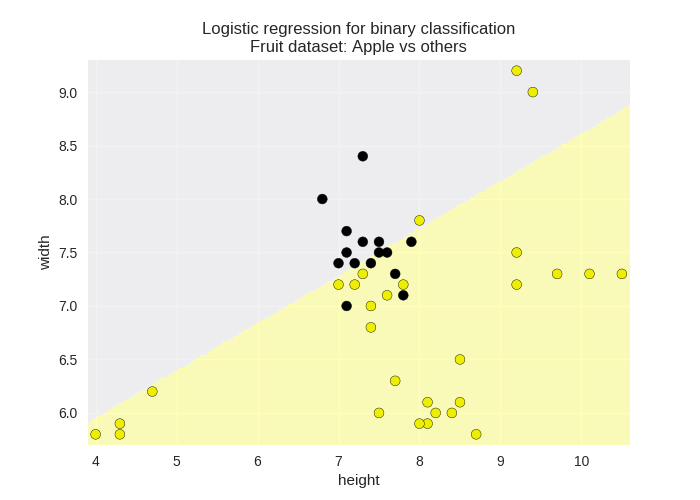

A fruit with height 6 and width 8 is predicted to be: an apple
A fruit with height 10 and width 7 is predicted to be: not an apple
Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.73


In [23]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
y_fruits_apple = y_fruits_2d == 1   # make into a binary problem: apples vs everything else
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state = 0))

clf = LogisticRegression(C=100).fit(X_train, y_train)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None,
                                         None, 'Logistic regression \
for binary classification\nFruit dataset: Apple vs others',
                                         subaxes)

h = 6
w = 8
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))

h = 10
w = 7
print('A fruit with height {} and width {} is predicted to be: {}'
     .format(h,w, ['not an apple', 'an apple'][clf.predict([[h,w]])[0]]))
subaxes.set_xlabel('height')
subaxes.set_ylabel('width')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#### Logistic regression on simple synthetic dataset

<IPython.core.display.Javascript object>


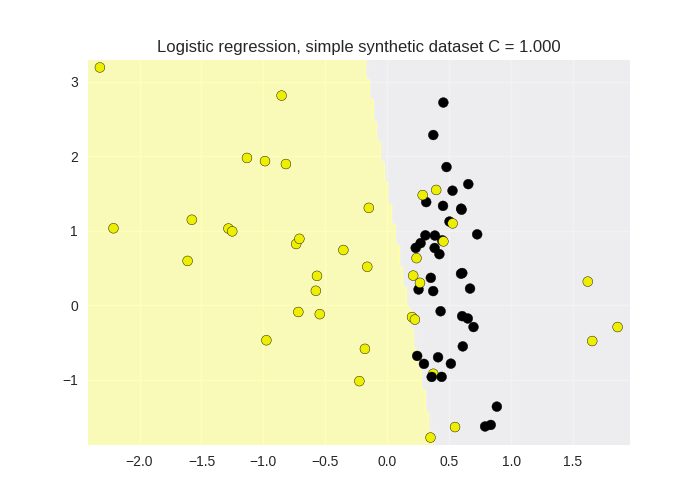

Accuracy of Logistic regression classifier on training set: 0.80
Accuracy of Logistic regression classifier on test set: 0.80


In [24]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (
plot_class_regions_for_classifier_subplot)


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
clf = LogisticRegression().fit(X_train, y_train)
title = 'Logistic regression, simple synthetic dataset C = {:.3f}'.format(1.0)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                         None, None, title, subaxes)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
     

#### Logistic regression regularization: C parameter

- The C parameter in logistic regression is a parameter that controls the regularization. For the purpose of using regularizaztion, it can be important to normalize all features so that they are on the same scale
- Higher values of C corresponds to less regularization.
- With larger values of C logistic regression tries to fit the training data as well as possible while with small values of C, the model tries harder to find model coefficients that are closer to 0, even if that model fits the training data a little bit worse, avoiding overfitting the dataset training.

<IPython.core.display.Javascript object>


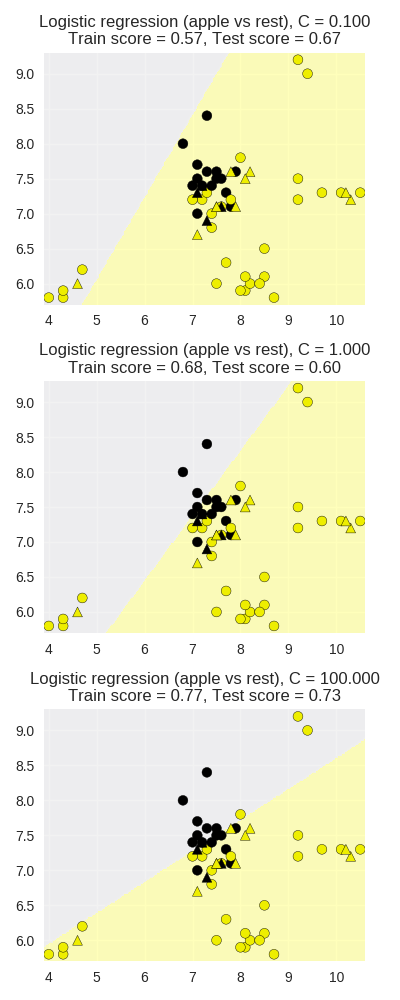

In [26]:
X_train, X_test, y_train, y_test = (
train_test_split(X_fruits_2d.as_matrix(),
                y_fruits_apple.as_matrix(),
                random_state=0))

fig, subaxes = plt.subplots(3, 1, figsize=(4, 10))

for this_C, subplot in zip([0.1, 1, 100], subaxes):
    clf = LogisticRegression(C=this_C).fit(X_train, y_train)
    title ='Logistic regression (apple vs rest), C = {:.3f}'.format(this_C)
    
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             X_test, y_test, title,
                                             subplot)
plt.tight_layout()

- The graphs above shows that increases C parameter 

#### Application to real dataset

In [27]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LogisticRegression().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Logistic regression classifier on training set: 0.96
Accuracy of Logistic regression classifier on test set: 0.96


### Support Vector Machines

- **Classifier margin**:
    - Defined as the maximum width the decision boundary area can be increased before hitting a data point
    - The best classified is the one which has the maximum amount of margin
- The  linear classifier with maximum margin is a **Linear Support Vector Machine** (**LSVM**)

#### Linear Support Vector Machine

- How tolerant ths LSVM is of misclassifying training points as compared to its objective of minimizing the margin between classes is controled by the regulatization parameter called C which by default is set to 1.0

<IPython.core.display.Javascript object>


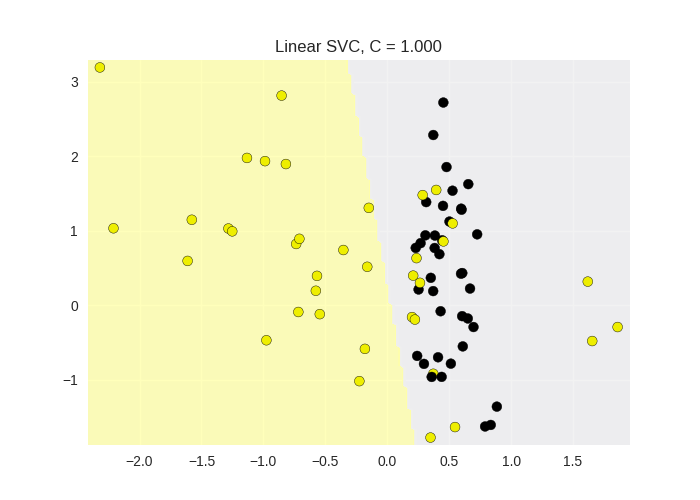

In [37]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

#### Linear Support Vector Machine: C parameter

- Regularizatiton for SVMs: the C parameter
    - The strenght of regularization is deterined by C
    - Larger values of C: less regulatization
        - This causes the model tofit the training data as well as possible
        - Each individual data point is important to classify correctly
    - Smaller values of C: more regularization
        - More tolerance of errors on individual data points

<IPython.core.display.Javascript object>


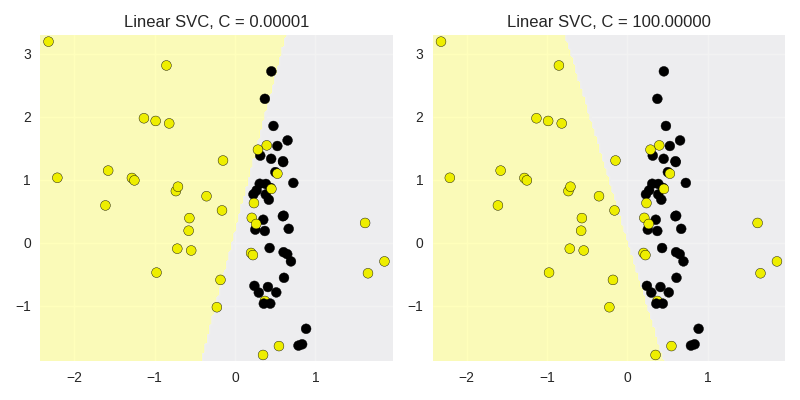

In [38]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

- On the right, when C is large, the decision boundary is adjusted so that more of the black training points are correctly classified. 
- While on the left, for small values of C, the classifier is more tolerant of these errors in favor of capturing the majority of data points correctly with a larger margin. 

#### Application to real dataset

In [31]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.94


- Line Models: pros and cons
    - Pros
        - Simple and easy to train
        - Fast prediction
        - Scales well to very large datasets
        - Works well with sparse data
        - reasons for prediction are relatively easy to interpret
    - Cons:
        - For lower-dimensional data, other models may have superior generalization performance
        - For classification, data may not be linearly separable

### Multi-class classification with linear models

- The multi-class problem is converted to a series of binary problems

#### LinearSVC with M classes generates M one vs rest classifiers.

In [3]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.26  0.71]
 [-1.63  1.16]
 [ 0.03  0.29]
 [ 1.24 -1.64]]
Intercepts:
 [-3.29  1.2  -2.72  1.16]


- What sklearn does here is to create four binary classifiers, one for each class

#### Multi-class results on the fruit dataset

<IPython.core.display.Javascript object>


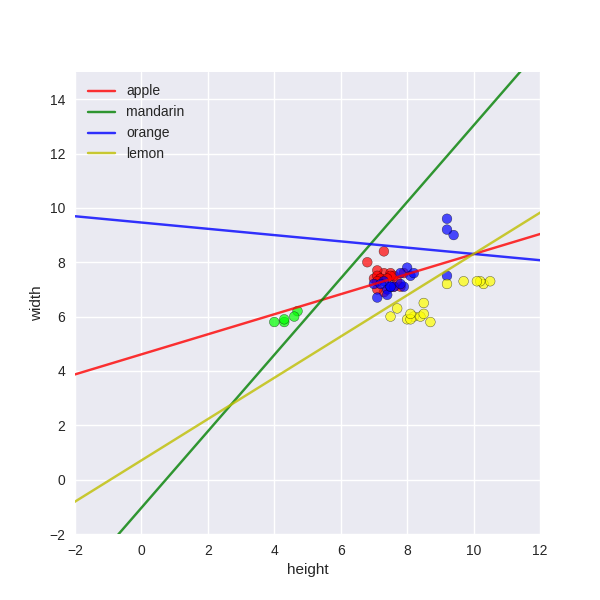

In [8]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

## Kernelized Support Vector Machines

- Kernelized SVMs can provide more complex models that can go beyond linear decision boundaries.
- They take the original input data and transform it to a new higher dimensional feature space, where it becomes much easier to classify the transform to data using a linear classifier
- Transforming the data can make it much easier for a linear classifier
- **Radial Basis Function** (**RBF**) kernel.
- The kernel function in an SVM tells us, given two points in the original input space, what is their similarity in the new feature space?
    - Fo the RBF kernel the similarity between two popints and the transformed feature is an exponentially decaying function of the distance between the vectors in the original input space.
    - Using the RBF kernel in effeect tranforms all the points inside a certain distance of one class to one area of the transformed feature space and all the points in the square class outside a certain radius get moved to a different are of the feature space 
- So the kernalized support vector machine tries to find the decision boundary with maximum margin between classes using a linear classifier in the transformed feature space not the original input space.
- The linear decision boundary learn feature space by linear SVM corresponds to a non-linear decision boundary in the original input space 
- The transformed feature representation is implicit

### Classification

<IPython.core.display.Javascript object>


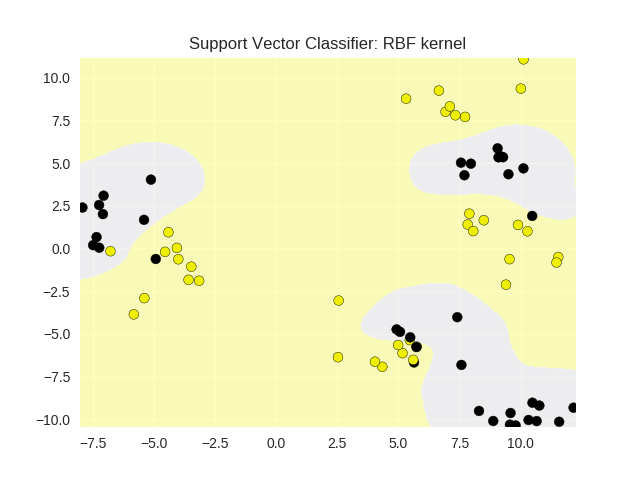

<IPython.core.display.Javascript object>


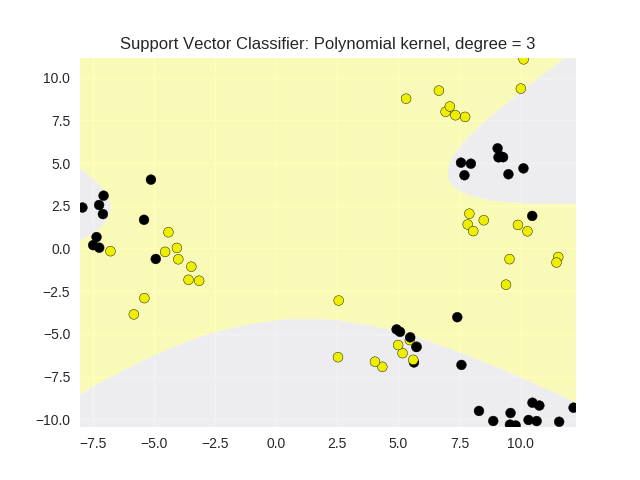

In [34]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

#### Support Vector Machine with RBF kernel: gamma parameter

- The RBF kernel has a gamma parameter
- This parameter controls how far the influence of a single trending example reaches, which in turn affects how tightly the decision boundaries end up surrounding points in the input space
- Small gammas means a larger similarity radius so that points farther apart are considered similar which results in more points being grouped together and amoother decision boundaries 
- Larger values of gamma the kernel value decays more quickly and points have to be very close to be considered similar. This results in more complex, tightly constrained decision boundaries 
- The most important thing to remember when applying SVMs is that it's important to normalize the input data so that all the features have comparable units thar are on the same scale.

<IPython.core.display.Javascript object>


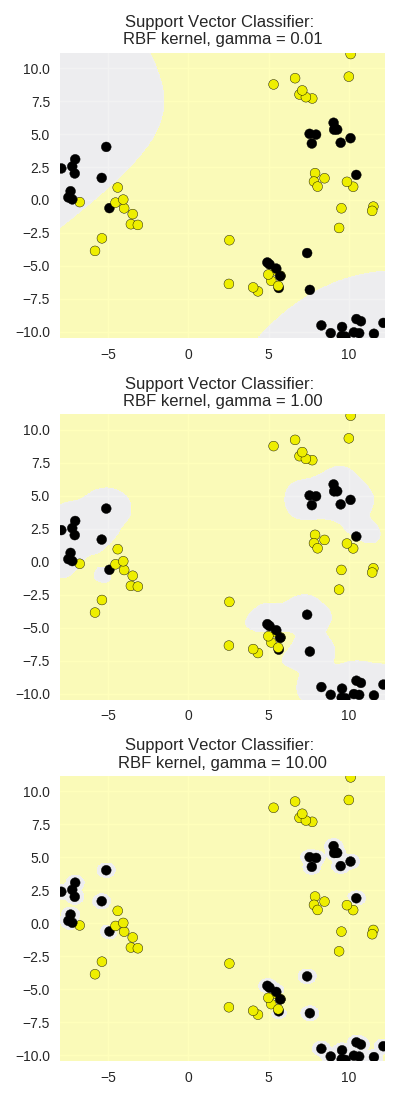

In [35]:
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

<IPython.core.display.Javascript object>


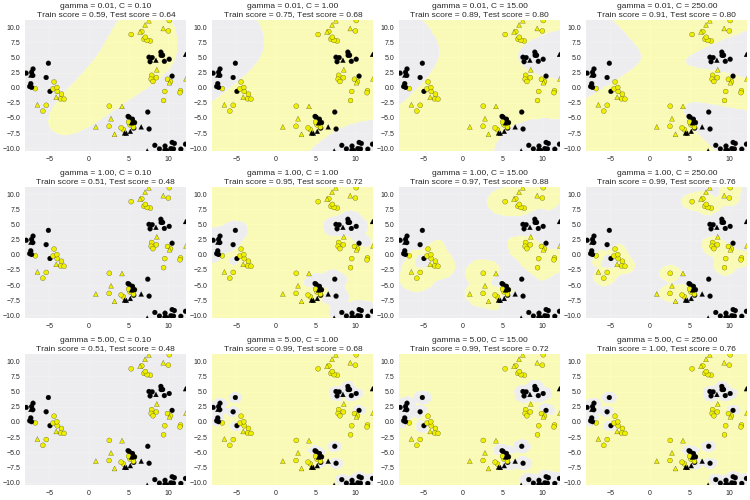

In [36]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

- If gamma is large, then C will have little to no effect. Well, if gamma is small, the model is much more constrained and the effective C will be similar to how it would affect a linear classifier. 
- Typically, gamma and C are tuned together, with the optimal combination typically in an intermediate range of values. 

### Application of SVMs to a real dataset: unnormalized data

In [13]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.98
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.96


- Kernelized Support Vector Machines: pros and cons
    - Pros:
        - can perform well on a range of datasets
        - versatile: different kernel functions can be specified, or custom kernels can be defined for specific data types
        - works wll for both low and high- dimensional data
    - cons:
        - Efficiency decreases as training set size increases
        - needs caraful normalization of input data and parameter tuning
        - does not provide direct probability 
        - Difficult to interpret why a prediction was made

**Kenelized Support Vector Mmachines (SVC): Important Parameters**
- Model complexity
    - kernel: type of kernel function to be used
        - Default = 'rbf' for radial basis function
        - Other types include 'polynomial'
    - kernel parameters:
        - gamma (γ): RBF kernel widht
    - C: regularization parameter
    - Typically C and gamma are tuned at the same time
        

## Cross-validation

- This is a method that uses multiple Train/Test splits each of which is used to train and evaluate a separate model 
- Why is this better than the standard method of using one Train/Test split? 
    - Cross-validation basically gives more stable and reliable estimates of how the classifiers likely to perform on average by running multiple different train/test splits and then averaging the results 
- The most commom type of cross-validation is K-fold cross-validation with K set to 5 or 10 
- **Leave-one-out** cross validation is just k-fold cross validation with k set to the number of data samples in the data set

### Example based on k-NN classifier with fruit dataset (2 features)

In [3]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)
X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()
cv_scores = cross_val_score(clf, X, y)
#by default this function does threefold cross-validation
#to change the dafault value change the cv variable

print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'
     .format(np.mean(cv_scores)))

Cross-validation scores (3-fold): [ 0.77  0.74  0.83]
Mean cross-validation score (3-fold): 0.781


### A note on performing cross-validation for more advanced scenarios.

In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is *not* to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data (see the lecture on data leakage later in the course).  Instead, scaling/normalizing must be computed and applied for each cross-validation fold separately.  To do this, the easiest way in scikit-learn is to use *pipelines*.  While these are beyond the scope of this course, further information is available in the scikit-learn documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

or the Pipeline section in the recommended textbook: Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O'Reilly Media).

## Validation curve example

- sometimes we want to evaluate the effect that an important parameter of a model has on the cross-validation scores the useful function validation curve makes it easy to run this type of experiment
- Like cross_val_score, validation curve will do threefold cross-validation by default.
- Unlike cross_val_score, you can also specify a classifier, parameter name, and set of parameter values you want to sweep across

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [5]:
print(train_scores)

[[ 0.49  0.42  0.41]
 [ 0.84  0.72  0.76]
 [ 0.92  0.9   0.93]
 [ 1.    1.    0.98]]


In [6]:
print(test_scores)

[[ 0.45  0.32  0.33]
 [ 0.82  0.68  0.61]
 [ 0.41  0.84  0.67]
 [ 0.36  0.21  0.39]]


<IPython.core.display.Javascript object>


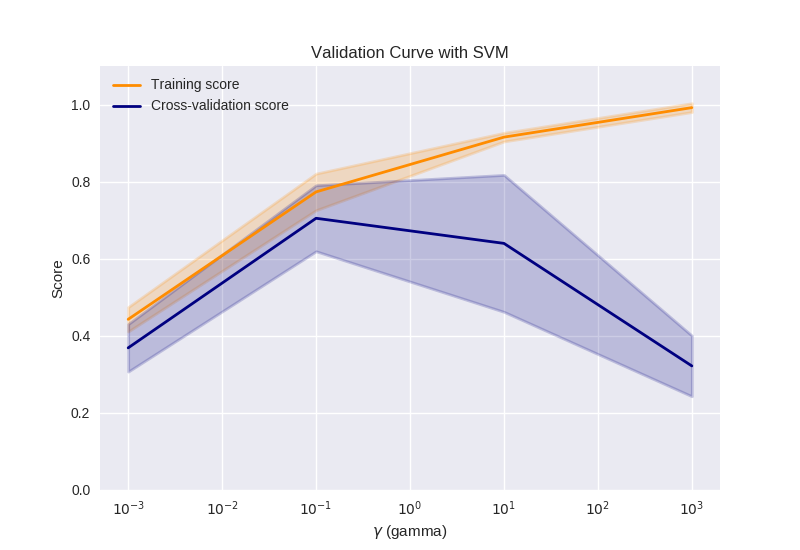

In [7]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Decision Trees

- Is a popopular supervised method that can be used for regression and classification
- Is a good exploratory method if youo're interested in getting a better ideia about what the influential features are in your dataset
- Basically decision tress learn a series of explicit if-then rules on feature values that result in a decision that predicts the target value
- Rather than try to figure out these tules manually for every task there are supervised algorithms that can learn them for us in a way that gets to an accurate decision quickly
- The goal when building a dedcision tree is to find the sequence of questions that has the best accuracy at classifying the data in the fewest steps
- Each decistion splits the tree in two branches
- An important concept is how informative a split of the data is. An informative split of the data is pne that does an excellent job at separating one class from the others
- There are a number of mathematical ways to compute the best split. One widely used criterion is called **information game**
- Decision trees can also be used for regression using the same process of testing the future values at each node and predicting the target value based on the contents of the leafnode
    - For regression, the leafnode prediction would be the mean value of the target values for the trianing points in that leaf

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from sklearn.model_selection import train_test_split


iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


- Notice that the training data here is predicted perfectly with an accuracy of 1.0. While the test data is a little bit worse. This is an indication that the tree is likely overfitting and in fact this is a problem with building decision trees in general that keep adding rules until the leafnodes are pure. Typically such trees are overly complex and essentially memorized the training data. So when building decision trees, we need to use some additional strategy to prevent this overfitting. 
- One strategy to prevent overfitting is to prevent the tree from becoming really detalied and complex by stopping its growth early, this is called **pre-pruning**
- We can do that by limiting either the maximum depth of the tree using the max depth parameter or the maximum number of leafnodes using the max leafnodes parameter 

#### Setting max decision tree depth to help avoid overfitting

In [14]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


#### Visualizing decision trees

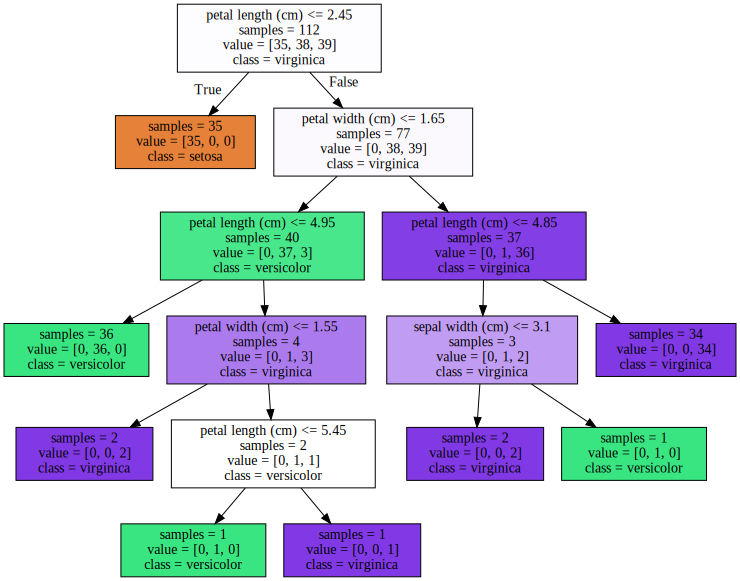

In [15]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

#### Pre-pruned version (max_depth = 3)

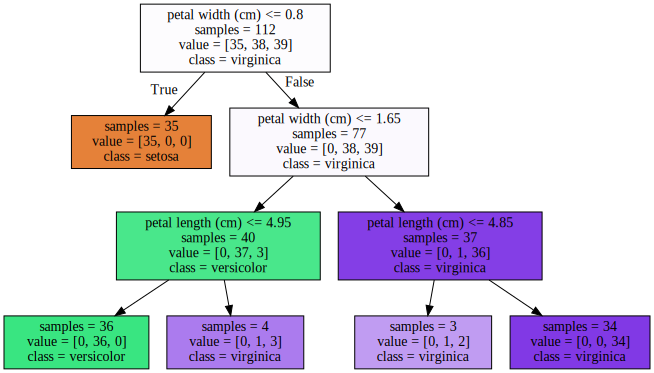

In [16]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

#### Feature importance

- A type of summary analysis
- This is a number between 0 and 1 that's assigned to an individual feature. It indicates how important that feature is to the overall prediction accuracy. 
- A feature importance of 0 means that the feature is not used at all in the prediction 
- A feature importance of 1 means that the feature perfectly predicts the target
- Tipically, feature importance numbers are always positive and they're normilized so they sum to one
- Note that if a feature has a low feature importance value, that doesn't necessarily mean that the feature is not important for prediction. It simply means that the particular feature wasn't chosen at an early level of the tree and this could be because the future may be identical or highly correlated with another informative feature and so doesn't provide any new additional signal for prediction.

- Feature importance values don't tell us which specific classes a feature might be especially predictive for, and they also don't indicate more complex relationships between features that may influence prediction.
- Even so the feature importance values provide an easy to understand summary that can give useful insight about individual features in the learning model, because feature importance can vary depending on the specific model learned for a particular train/test split for example.
- It's common when computing feature importance to use an average over multiple train/test splits. For example when performing cross-validation.


<IPython.core.display.Javascript object>


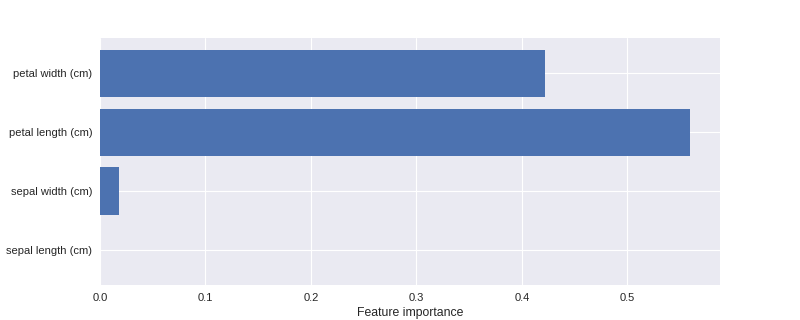

Feature importances: [ 0.    0.02  0.56  0.42]


In [17]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, iris.feature_names)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

- Here's the feature importance chart for the iris decision tree and this example for this particular train/test split of the iris data set. The pedal length feature easily has the largest feature importance weight. 

<IPython.core.display.Javascript object>


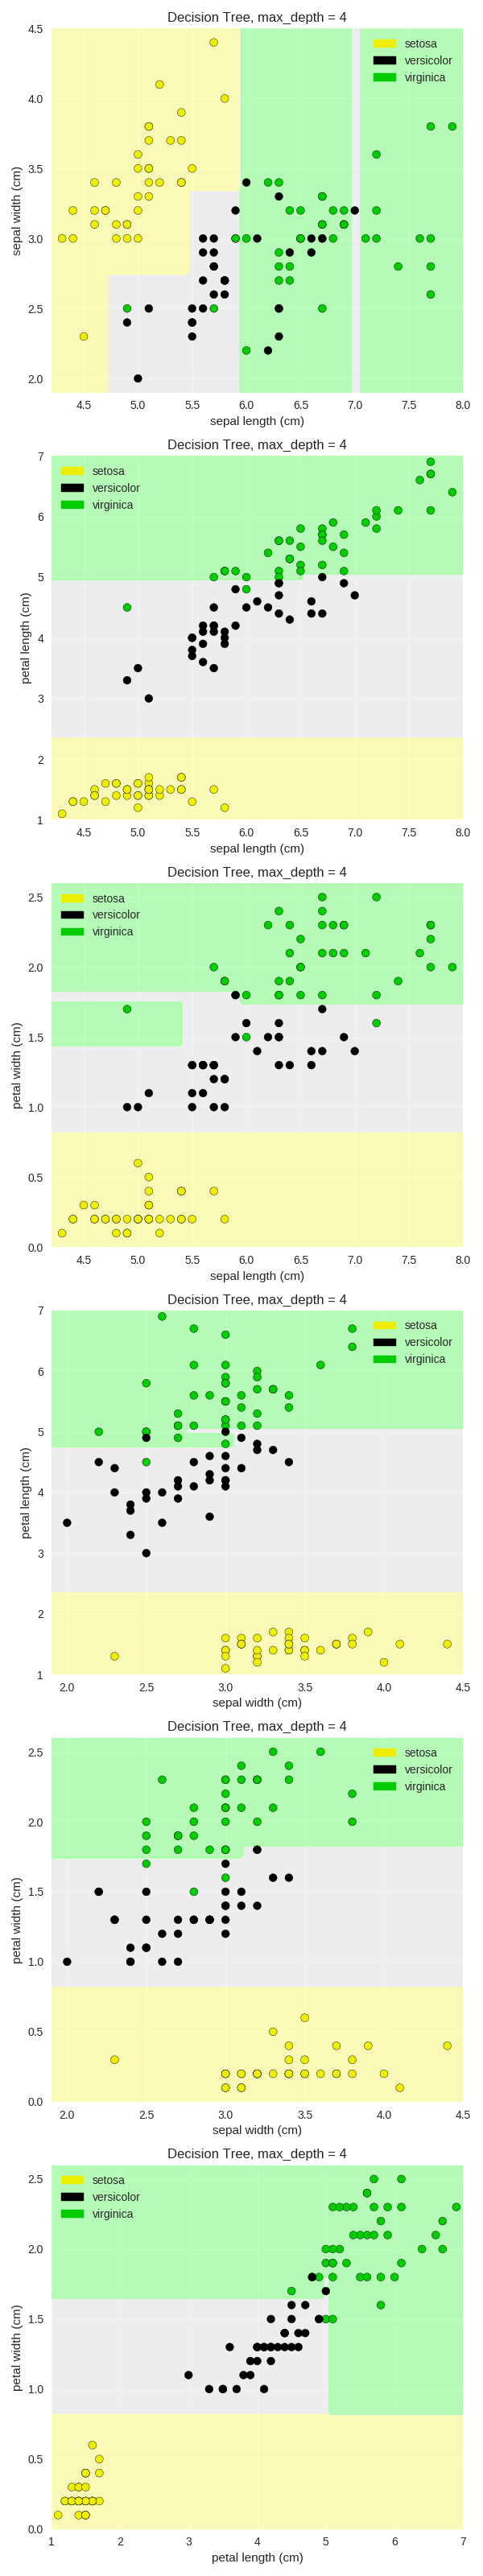

In [11]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

#### Decision Trees on a real-world dataset

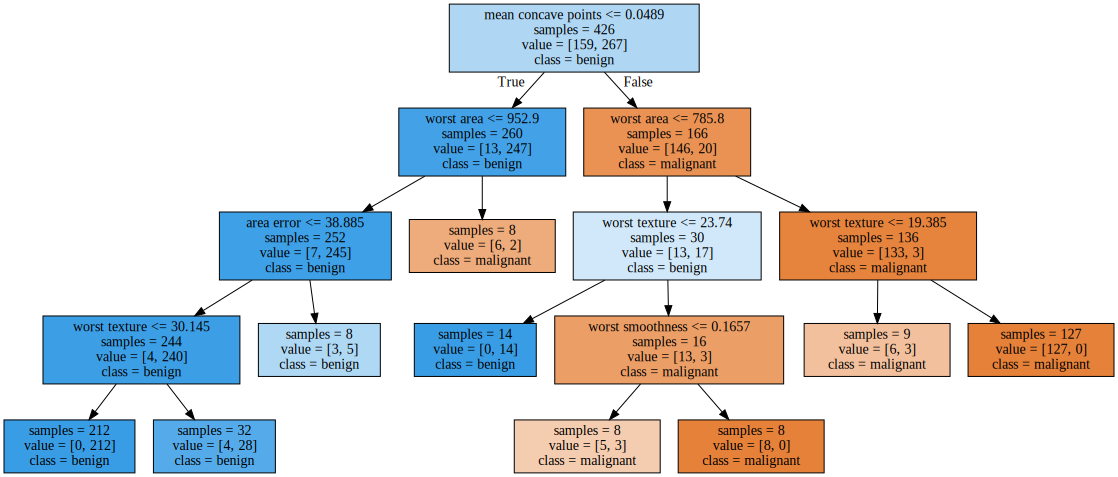

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)
plot_decision_tree(clf, cancer.feature_names, cancer.target_names)



In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset: decision tree
Accuracy of DT classifier on training set: 0.96
Accuracy of DT classifier on test set: 0.94


<IPython.core.display.Javascript object>


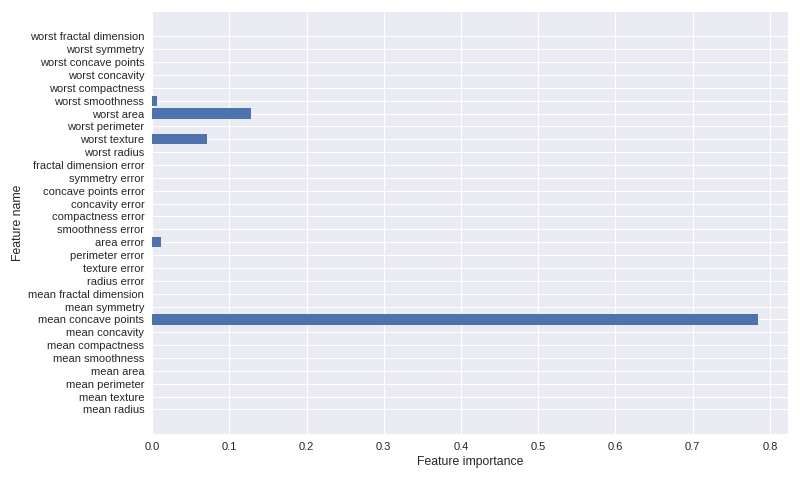

In [23]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

plt.figure(figsize=(10,6),dpi=80)
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()

- Decision trees: pros e cons
    - pros
        - Easily visualized and interpreted
        - No feature normalization or scaling typically needed
        - Work well with datasets using a mixture of feature types (continuous, categorical, binary)
    - cons
        - even after tuning, decision trees can often stil overfit
        - usually need an ensemble of trees for better generalizatioon perfomance